#Metro Interstate Traffic Volume

Abstract: Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.

`holiday` Categorical US National holidays plus regional holiday, Minnesota State Fair

`temp` Numeric Average temp in kelvin

`rain_1h` Numeric Amount in mm of rain that occurred in the hour

`snow_1h` Numeric Amount in mm of snow that occurred in the hour

`clouds_all` Numeric Percentage of cloud cover

`weather_main` Categorical Short textual description of the current weather

`weather_description` Categorical Longer textual description of the current weather

`date_time` DateTime Hour of the data collected in loc

`traffic_volume` Numeric Hourly I-94 ATR 301 reported westbound traffic volume (our target)


---



### Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv' , parse_dates=['date_time'], index_col=['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


## Data Preprocessing

In [ ]:
df.sort_index(inplace = True)

In [ ]:
df.isna().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume,0


In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df.drop(columns=['holiday'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 48204 non-null  float64
 1   rain_1h              48204 non-null  float64
 2   snow_1h              48204 non-null  float64
 3   clouds_all           48204 non-null  int64  
 4   weather_main         48204 non-null  object 
 5   weather_description  48204 non-null  object 
 6   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
df.index

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=48204, freq=None)

In [ ]:
df.duplicated().sum()

29

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48175.000000,48175.000000,48175.000000,48175.000000,48175.000000
mean,281.205968,0.334465,0.000223,49.367120,3259.827421
std,13.339498,44.802611,0.008170,39.014885,1986.897856
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.500000
50%,282.460000,0.000000,0.000000,64.000000,3379.000000
75%,291.808000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df['weather_description'].unique() #weather_main Doing the job

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [ ]:
df.drop(columns=['weather_description'],inplace=True)

In [ ]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
one_hot_encoded = pd.get_dummies(df['weather_main'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df.drop(columns=['weather_main'],inplace=True)

In [ ]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
date_time,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,False,False,False,False,False,False
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,False,False,False,False,False,False
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,False,False,False,False,False,False
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,False,False,False,False,False,False
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis (EDA)




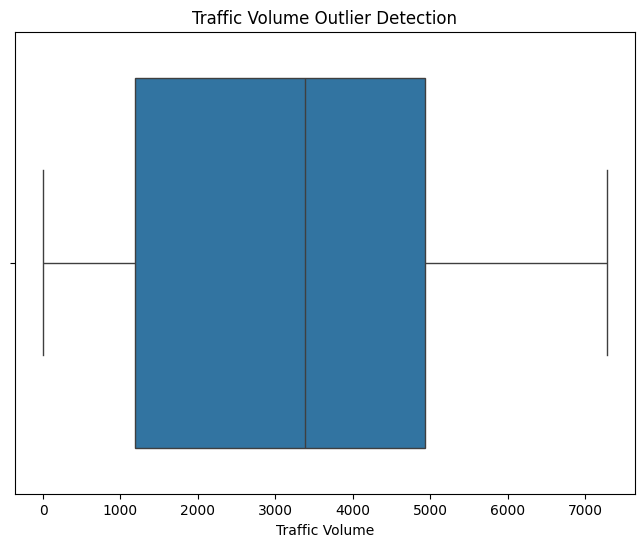

In [ ]:
#outlier detection
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['traffic_volume'])
plt.title('Traffic Volume Outlier Detection')
plt.xlabel('Traffic Volume')
plt.show()

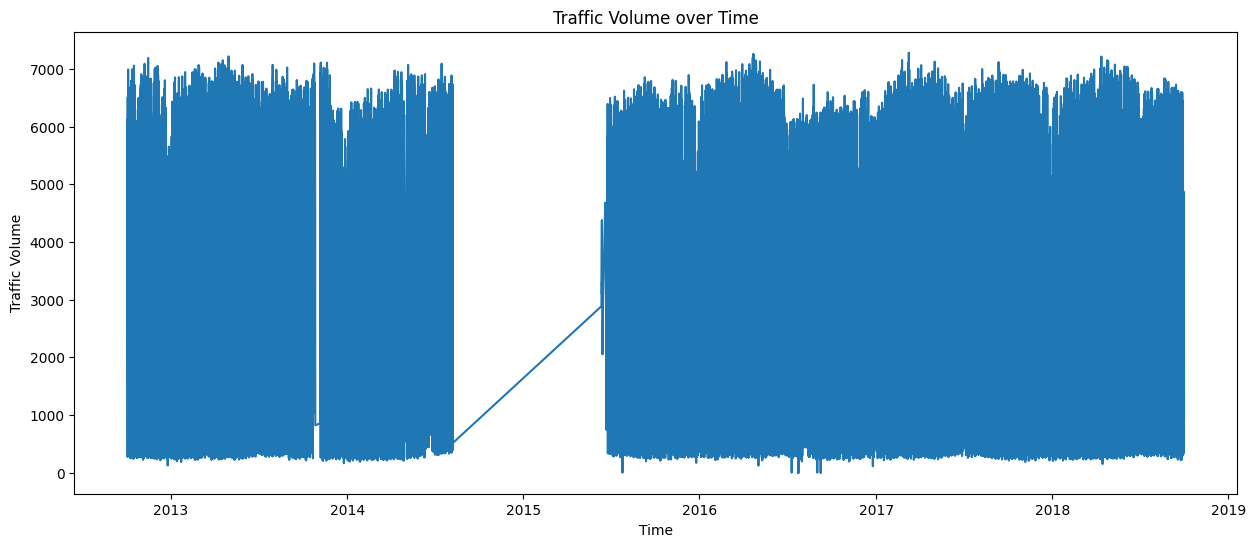

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['traffic_volume'])
plt.title('Traffic Volume over Time')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.show()


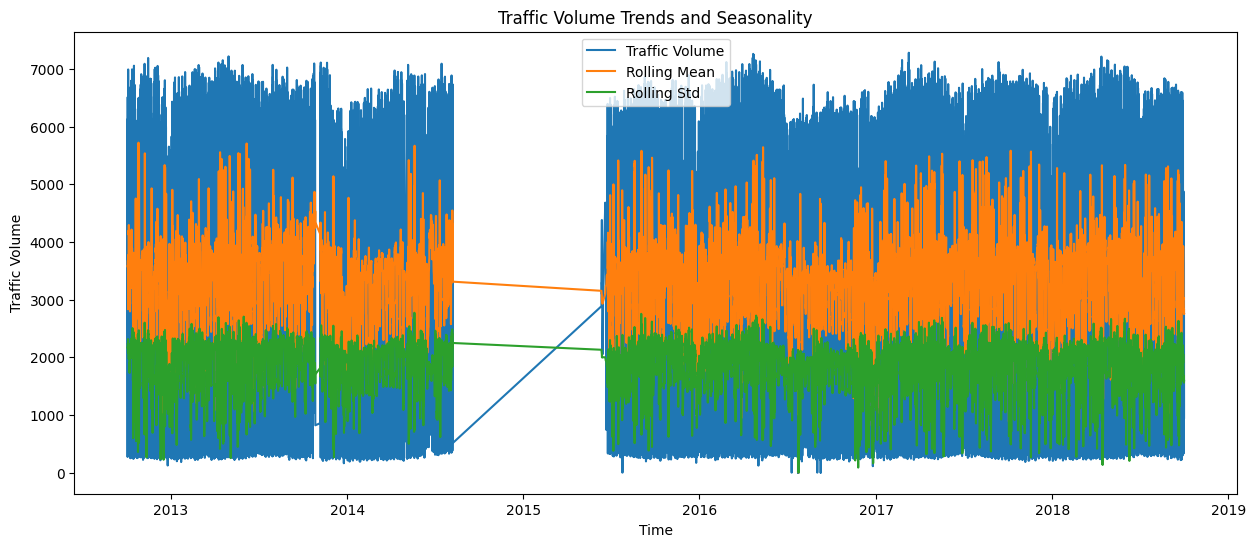

In [ ]:
rolling_mean = df['traffic_volume'].rolling(window=24).mean()
rolling_std = df['traffic_volume'].rolling(window=24).std()


plt.figure(figsize=(15, 6))
plt.plot(df['traffic_volume'], label='Traffic Volume')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.title('Traffic Volume Trends and Seasonality')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


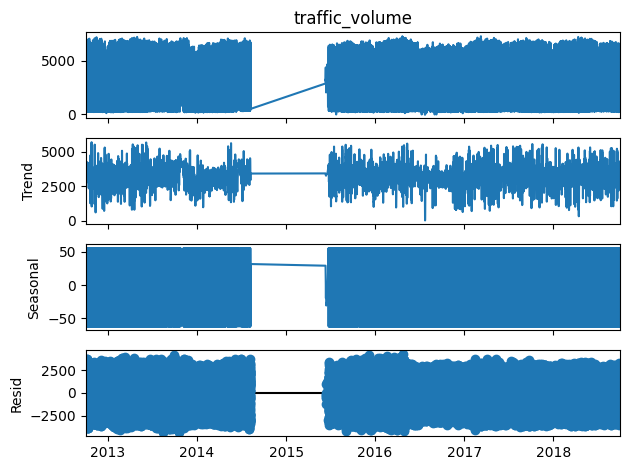

In [ ]:
# Seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
result.plot()
plt.show()


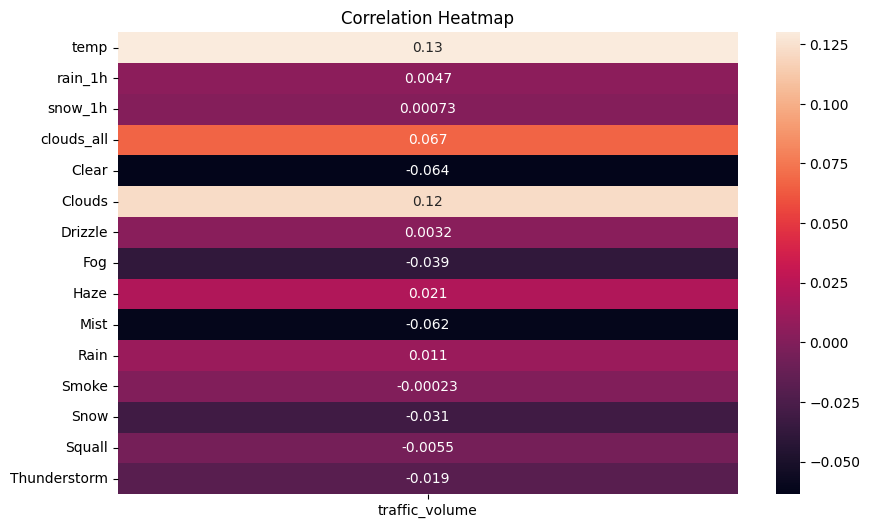

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr().loc[['traffic_volume']].drop('traffic_volume',axis=1).transpose(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering


In [ ]:
df['hour'] =df.index.hour

df['day_of_week'] = df.index.dayofweek

In [ ]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [ ]:
df.isna().sum()

,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
traffic_volume,0
Clear,0
Clouds,0
Drizzle,0
Fog,0
Haze,0


In [ ]:
df['prev_traffic_volume'].head()

,prev_traffic_volume
date_time,
2012-10-02 09:00:00,NaN
2012-10-02 10:00:00,5545.0
2012-10-02 11:00:00,4516.0
2012-10-02 12:00:00,4767.0
2012-10-02 13:00:00,5026.0


In [ ]:
df['prev_traffic_volume'].fillna(0, inplace=True)

In [ ]:
df['prev_traffic_volume'].head()

,prev_traffic_volume
date_time,
2012-10-02 09:00:00,0.0
2012-10-02 10:00:00,5545.0
2012-10-02 11:00:00,4516.0
2012-10-02 12:00:00,4767.0
2012-10-02 13:00:00,5026.0


## Train-Test Split


In [ ]:
train_size = int(len(df['traffic_volume']) * 0.7)
val_size = int(len(df['traffic_volume']) * 0.15)
test_size = int(len(df['traffic_volume']) * 0.15)

print('train_size :', train_size)
print('val_size :', val_size)
print('test_size :',test_size)

train_size : 33722
val_size : 7226
test_size : 7226


In [ ]:
target =df['traffic_volume']

from sklearn.model_selection import train_test_split

train_valid, test = train_test_split(target, test_size=7226, shuffle=False)
train, valid = train_test_split(train_valid, test_size=7226, shuffle=False)


In [ ]:
train.shape, valid.shape, test.shape

((33723,), (7226,), (7226,))

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_pre = scaler.fit_transform(train.values.reshape(-1,1))
val_pre = scaler.transform(valid.values.reshape(-1,1))
test_pre = scaler.transform(test.values.reshape(-1,1))

In [ ]:
train_pre.shape, val_pre.shape, test_pre.shape

((33723, 1), (7226, 1), (7226, 1))

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array
window_size = 30

train_Xy = timeseries_dataset_from_array(train_pre, targets=train_pre[window_size:], sequence_length = window_size)
val_Xy = timeseries_dataset_from_array(val_pre, targets=val_pre[window_size:], sequence_length = window_size)
test_Xy = timeseries_dataset_from_array(test_pre, targets=test_pre[window_size:], sequence_length = window_size)


#Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

### First model (RNN)

In [ ]:

#build Arch

model_RNN = Sequential([SimpleRNN(units=10, activation='tanh', return_sequences=True),
                    SimpleRNN(units=10, activation='tanh', return_sequences=True),
                    SimpleRNN(units=10, activation='tanh'),
                    Dense(units=1, activation= 'relu')
                    ])

#compile
model_RNN.compile(optimizer= 'adam', loss=['mae'], metrics=['mae'])


#fit
RNN_history= model_RNN.fit(train_Xy, validation_data= val_Xy, epochs=10, batch_size=1024)

Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 0.1449 - mae: 0.1449 - val_loss: 0.0630 - val_mae: 0.0630
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0518 - val_mae: 0.0518
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0600 - mae: 0.0600 - val_loss: 0.0496 - val_mae: 0.0496
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.0585 - mae: 0.0585 - val_loss: 0.0493 - val_mae: 0.0493
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: 0.0579 - mae: 0.0579 - val_loss: 0.0488 - val_mae: 0.0488
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0576 - mae: 0.0576 - val_loss: 0.0485 - val_mae: 0.0485
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0574 - mae: 0.0574 - val_loss: 0.0483 - val_mae: 0.0483
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 0.0572 - mae: 0.0572 - val_loss: 0.0482 - val_mae: 0.0482
Epoch 9/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
train_pred_RNN = scaler.inverse_transform(model_RNN.predict(train_Xy))
test_pred_RNN= scaler.inverse_transform(model_RNN.predict(test_Xy))
val_pred_RNN = scaler.inverse_transform(model_RNN.predict(val_Xy))

264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(scaler.inverse_transform(test_pre[window_size:]), test_pred_RNN)
mse = mean_squared_error(scaler.inverse_transform(test_pre[window_size:]), test_pred_RNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(scaler.inverse_transform(test_pre[window_size:]), test_pred_RNN)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)


MAE: 343.67249136947805
MSE: 247709.62068190795
RMSE: 497.7043506760896
MAPE: 0.1869632438205814


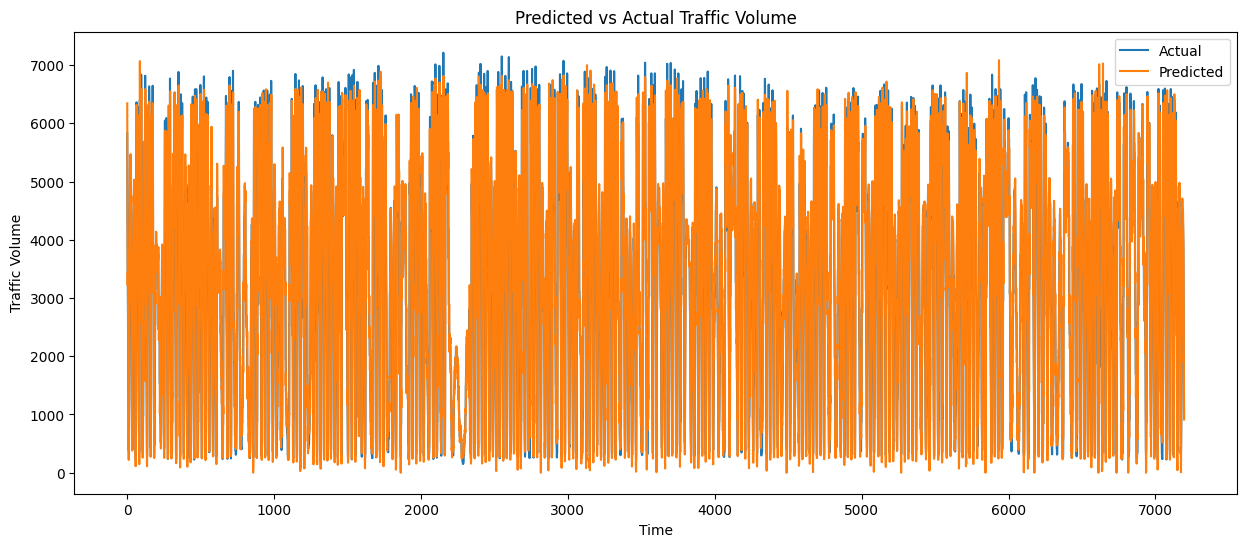

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(test_pre[window_size:]), label='Actual')
plt.plot(test_pred_RNN, label='Predicted')
plt.title('Predicted vs Actual Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


### Second model (LSTM)

In [ ]:
#build Arch

model_LSTM= Sequential([LSTM(units=10, activation='tanh', return_sequences=True),
                    LSTM(units=10, activation='tanh', return_sequences=True),
                    LSTM(units=10, activation='tanh'),
                    Dense(units=1, activation= 'relu')]
)

#compile
model_LSTM.compile(optimizer= 'adam', loss=['mae'], metrics=['mae'])


#fit
LSTM_history= model_LSTM.fit(train_Xy, validation_data= val_Xy, epochs=10, batch_size=1024)

Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - loss: 0.2672 - mae: 0.2672 - val_loss: 0.1713 - val_mae: 0.1713
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 0.1722 - mae: 0.1722 - val_loss: 0.1239 - val_mae: 0.1239
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.1270 - mae: 0.1270 - val_loss: 0.0948 - val_mae: 0.0948
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - loss: 0.0940 - mae: 0.0940 - val_loss: 0.0617 - val_mae: 0.0617
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - loss: 0.0660 - mae: 0.0660 - val_loss: 0.0519 - val_mae: 0.0519
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - loss: 0.0588 - mae: 0.0588 - val_loss: 0.0510 - val_mae: 0.0510
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - loss: 0.0576 - mae: 0.0576 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.0574 - mae: 0.0574 - val_loss: 0.0487 - val_mae: 0.0487
Epoch 9/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
train_pred_LSTM = scaler.inverse_transform(model_LSTM.predict(train_Xy))
test_pred_LSTM = scaler.inverse_transform(model_LSTM.predict(test_Xy))
val_pred_LSTM = scaler.inverse_transform(model_LSTM.predict(val_Xy))

264/264 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(test_pre[window_size:]), test_pred_LSTM)
mse = mean_squared_error(scaler.inverse_transform(test_pre[window_size:]), test_pred_LSTM)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(scaler.inverse_transform(test_pre[window_size:]), test_pred_LSTM)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)


MAE: 337.32140034712177
MSE: 247765.9203373998
RMSE: 497.7609067990372
MAPE: 0.15241475313025518


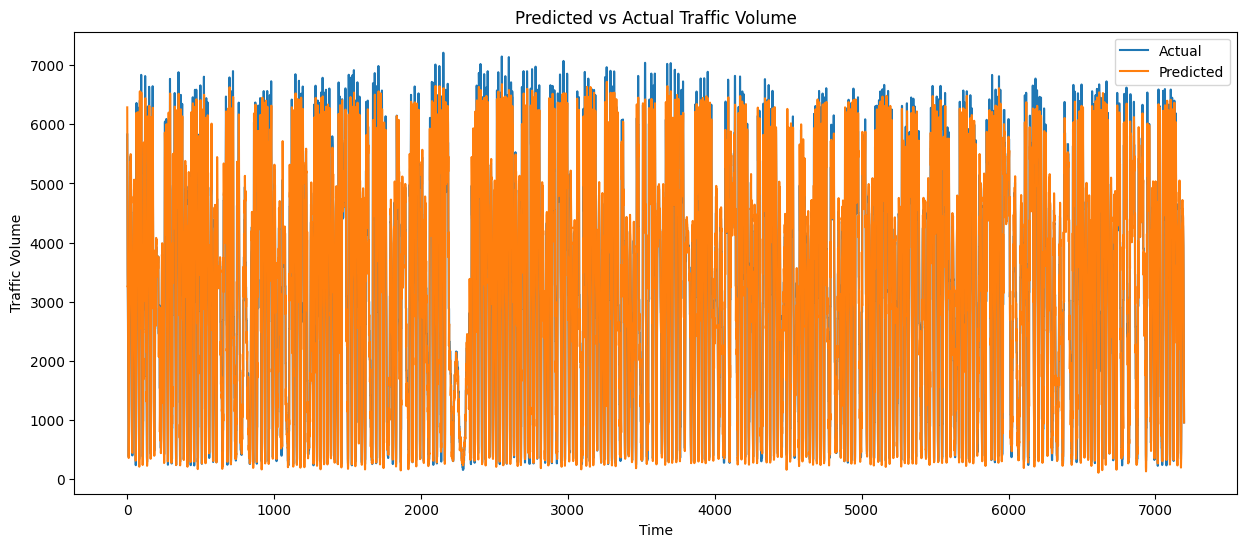

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(test_pre[window_size:]), label='Actual')
plt.plot(test_pred_LSTM, label='Predicted')
plt.title('Predicted vs Actual Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


### Loss and the validation loss between the two models



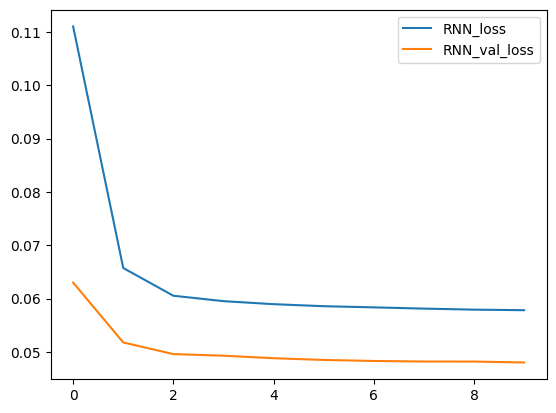

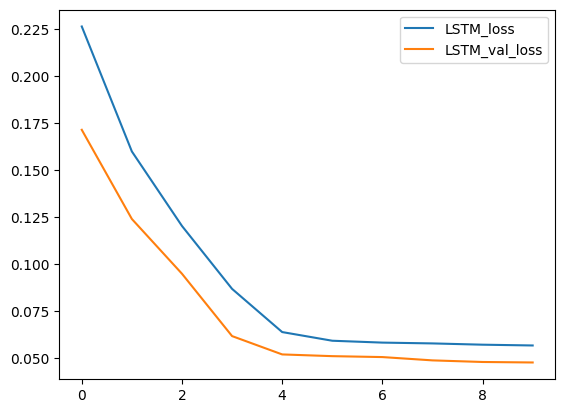

In [ ]:
#Loss and the validation loss for RNN model
plt.plot(RNN_history.history['loss'],label='RNN_loss')
plt.plot(RNN_history.history['val_loss'],label='RNN_val_loss')
plt.legend()
plt.show()

#Loss and the validation loss for LSTM model
plt.plot(LSTM_history.history['loss'],label='LSTM_loss')
plt.plot(LSTM_history.history['val_loss'],label='LSTM_val_loss')
plt.legend()
plt.show()


**Insight**

Both the RNN and LSTM models has a stable loss and validation loss after around 4-6 iterations.

The LSTM model has a lower validation loss compared to the RNN model, so that leads us to realize LSTM model is better able to generalize to the validation data, and is less prone to overfitting compared to the RNN model.

Overall, the comparison indicates that the LSTM model is outperforming the RNN model in terms of both training loss and validation loss. This implies the LSTM architecture is more suitable for the given task and is able to learn the underlying patterns more effectively than the simpler RNN.